In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_chroma_stft.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_chroma_stft.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_chroma_stft.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_chroma_stft.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [6]:
X_test = X_test.iloc[:,1:2]
#normalization (helps with exploding gradient); good as we are mixing a lot of datasets
def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [7]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 178,186
Trainable params: 178,186
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 178,186
Trainable params: 178,186
Non-trainable params: 0
_________________________________________________________________


In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1), (4233, 1), (4499, 10), (4233, 10))

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 120
num_batch_size = 64
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model_chroma_stft=model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/120
71/71 [==============================] - 1s 6ms/step - loss: 2.0629 - accuracy: 0.2223 - val_loss: 2.0742 - val_accuracy: 0.1859

Epoch 00001: val_loss improved from inf to 2.07421, saving model to .\audio_classification.hdf5
Epoch 2/120
71/71 [==============================] - 0s 3ms/step - loss: 1.9732 - accuracy: 0.2349 - val_loss: 2.0711 - val_accuracy: 0.1956

Epoch 00002: val_loss improved from 2.07421 to 2.07111, saving model to .\audio_classification.hdf5
Epoch 3/120
71/71 [==============================] - 0s 3ms/step - loss: 1.9579 - accuracy: 0.2458 - val_loss: 2.0681 - val_accuracy: 0.1923

Epoch 00003: val_loss improved from 2.07111 to 2.06813, saving model to .\audio_classification.hdf5
Epoch 4/120
71/71 [==============================] - 0s 3ms/step - loss: 1.9561 - accuracy: 0.2403 - val_loss: 2.0785 - val_accuracy: 0.1845

Epoch 00004: val_loss did not improve from 2.06813
Epoch 5/120
71/71 [==============================] - 0s 3ms/step - loss: 1.9547 - acc

71/71 [==============================] - 0s 3ms/step - loss: 1.9253 - accuracy: 0.2532 - val_loss: 2.0813 - val_accuracy: 0.2046

Epoch 00042: val_loss did not improve from 2.05161
Epoch 43/120
71/71 [==============================] - 0s 3ms/step - loss: 1.9231 - accuracy: 0.2536 - val_loss: 2.0831 - val_accuracy: 0.2013

Epoch 00043: val_loss did not improve from 2.05161
Epoch 44/120
71/71 [==============================] - 0s 3ms/step - loss: 1.9202 - accuracy: 0.2496 - val_loss: 2.0778 - val_accuracy: 0.2164

Epoch 00044: val_loss did not improve from 2.05161
Epoch 45/120
71/71 [==============================] - 0s 3ms/step - loss: 1.9201 - accuracy: 0.2483 - val_loss: 2.0823 - val_accuracy: 0.2017

Epoch 00045: val_loss did not improve from 2.05161
Epoch 46/120
71/71 [==============================] - 0s 3ms/step - loss: 1.9228 - accuracy: 0.2498 - val_loss: 2.0827 - val_accuracy: 0.1911

Epoch 00046: val_loss did not improve from 2.05161
Epoch 47/120
71/71 [=======================

71/71 [==============================] - 0s 4ms/step - loss: 1.9117 - accuracy: 0.2581 - val_loss: 2.1008 - val_accuracy: 0.1987

Epoch 00084: val_loss did not improve from 2.05161
Epoch 85/120
71/71 [==============================] - 0s 4ms/step - loss: 1.9124 - accuracy: 0.2583 - val_loss: 2.1013 - val_accuracy: 0.1996

Epoch 00085: val_loss did not improve from 2.05161
Epoch 86/120
71/71 [==============================] - 0s 4ms/step - loss: 1.9126 - accuracy: 0.2512 - val_loss: 2.1022 - val_accuracy: 0.2008

Epoch 00086: val_loss did not improve from 2.05161
Epoch 87/120
71/71 [==============================] - 0s 4ms/step - loss: 1.9108 - accuracy: 0.2514 - val_loss: 2.0962 - val_accuracy: 0.1947

Epoch 00087: val_loss did not improve from 2.05161
Epoch 88/120
71/71 [==============================] - 0s 4ms/step - loss: 1.9132 - accuracy: 0.2507 - val_loss: 2.0968 - val_accuracy: 0.2043

Epoch 00088: val_loss did not improve from 2.05161
Epoch 89/120
71/71 [=======================

In [12]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.26205822825431824
Testing Accuracy:  0.21379636228084564


In [13]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.21379636228084564


In [14]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[9 5 4 ... 3 3 3]


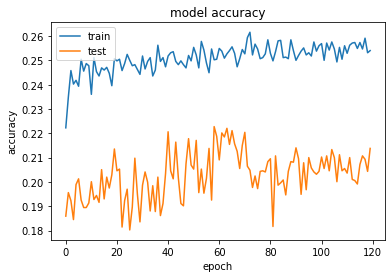

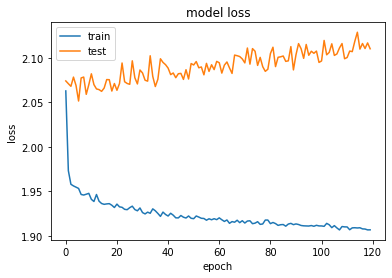

In [15]:
# summarize history for accuracy
plt.plot(model_chroma_stft.history['accuracy'])
plt.plot(model_chroma_stft.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_chroma_stft.history['loss'])
plt.plot(model_chroma_stft.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
train_hist = pd.DataFrame(model_chroma_stft.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.062922,0.222272,2.074206,0.185920
1,1.973239,0.234941,2.071105,0.195606
2,1.957911,0.245832,2.068128,0.192299
3,1.956080,0.240276,2.078501,0.184503
4,1.954672,0.241832,2.069080,0.198913
...,...,...,...,...
115,1.908997,0.257391,2.109981,0.207182
116,1.907729,0.254723,2.116307,0.210725
117,1.907557,0.259169,2.110679,0.209308
118,1.906603,0.253167,2.116958,0.204347


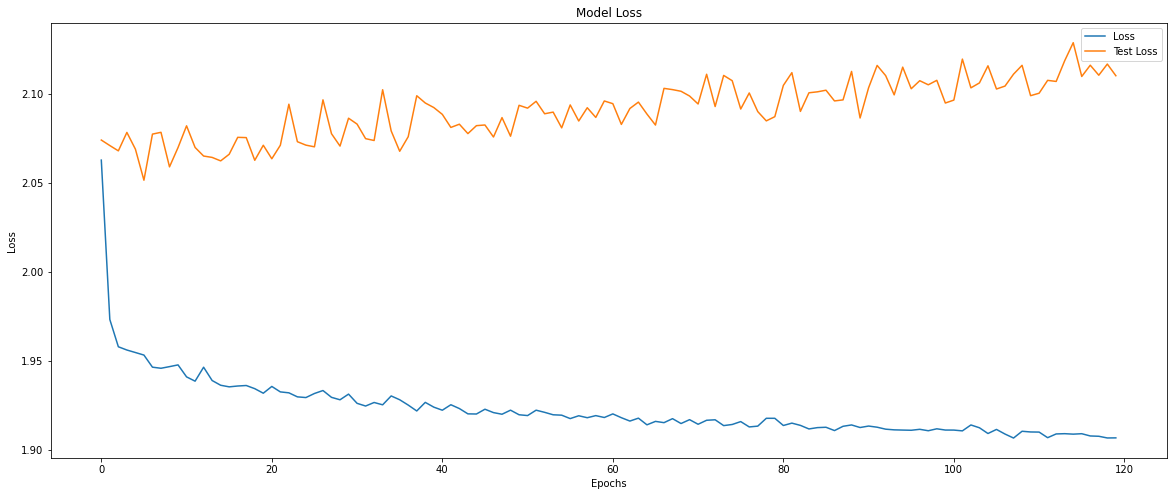

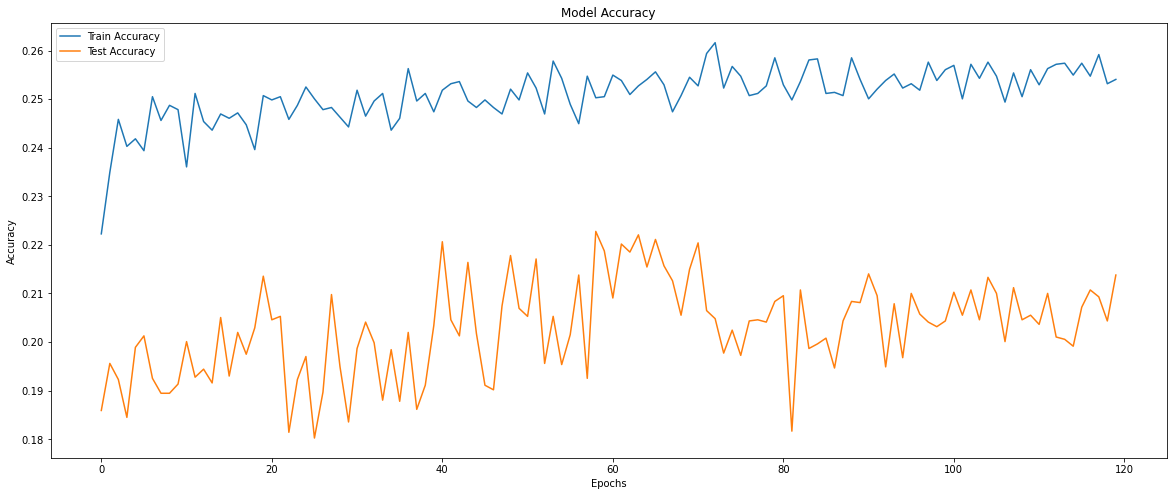

In [17]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [18]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[113   0  73  49  27  74   3 109  30  22]
 [  0   0  23  36   6   6   0  11  54  85]
 [ 17   0  84 107  41  44   0 105  15  87]
 [  7   0  94 103  33  34   0  75  42 112]
 [ 18   0  82  39  49  52   3 217   9  31]
 [ 45   0  34  71  66  44   9 181   7  26]
 [ 31   0   1   2   2  17  22 102   3   4]
 [ 35   0  59  27  37  59   7 207   7  14]
 [  6   0  30  63  38   9   0  25 129  93]
 [ 12   0  52 141  13   7   0  26  95 154]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.40      0.23      0.29       500
           1       0.00      0.00      0.00       221
           2       0.16      0.17      0.16       500
           3       0.16      0.21      0.18       500
           4       0.16      0.10      0.12       500
           5       0.13      0.09      0.11       483
           6       0.50      0.12      0.19       184
           7       0.20      0.46      0.27       452
           8       0.33      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta